# Task 2 - Suprvised Machine learning

## Problem definition : 
Using regression technique, predicting the percentage of marks that a student is expected to score based 
                     upon the number of hours they have studied. This simple linear regression task includes just two      variables.

## Dataset :
http://bit.ly/w-data
        

In [33]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [60]:
#reading the data into a file
file_path = 'http://bit.ly/w-data'
dataset = pd.read_csv(file_path)
print('File created successfully')
dataset.head(10)

File created successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [61]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
#Marking down data by converting into labels(output) and attributes(inputs)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values
print('created labels and attributes successfully')

created labels and attributes successfully


## Data Visualization 

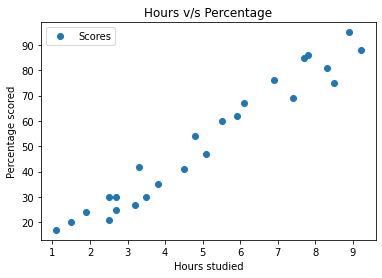

In [11]:
#Plotting an Hours v/s Percentage graph
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours v/s Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

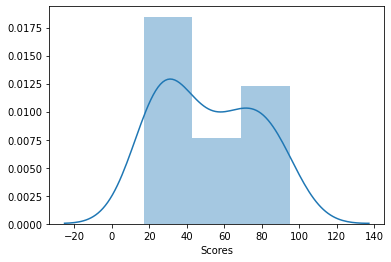

In [58]:
#checking the scores distribution
sns.distplot(dataset['Scores'])

In [27]:
#splitting the dataset into train and test data for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
print('train and test datasets created successfully')

train and test datasets created successfully


## Model Training



In [28]:
#using train dataset to for a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('training successful')

training successful


## Regression line visualization

### y = ax + b 

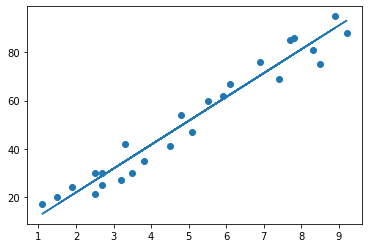

In [38]:
#plotting a graph for the test data
line = model.coef_*X+model.intercept_

plt.scatter(X,y)
plt.plot(X, line)
plt.show()

## Model predictions 

In [63]:
#comapring actual values with predicted ones
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


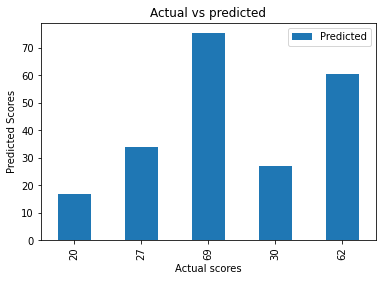

In [65]:
# Plotting the prediction with actual values
df.plot(x='Actual', y='Predicted',kind = 'bar')  
plt.title('Actual vs predicted')  
plt.xlabel('Actual scores')  
plt.ylabel('Predicted Scores')  
plt.show()

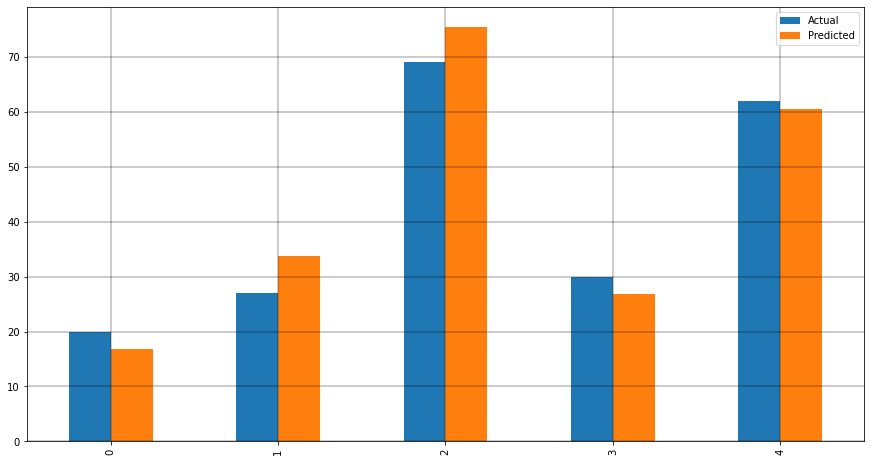

In [67]:
#visualising comparison result as a bar graph
df1 = df.head()
df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color='black')
plt.show()

In [56]:
#testing with custom data
hours = [[9.2]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
#final_prediction = model.predict(np.array([[9.25]]).reshape(1,1))[0][0]
#print("Predicted scores on 9.25 hours study:", final_prediction)

No of Hours = [[9.2]]
Predicted Score = 93.19619966334326


## Model evaluation

In [ ]:
Evaluating the model performance using the mean absolute error

In [51]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error :', mae)

Mean absolute error : 4.183859899002982
